<a href="https://colab.research.google.com/github/MMENDONNCA/Regressao_agrupamento/blob/main/Estudo_regressao_agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAÇÕES 

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import axes3d
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score

# REGRESSÃO

## DATASET

In [4]:
df = pd.read_csv('https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df.variety = pd.factorize(df.variety)[0]
print(df)

     sepal.length  sepal.width  petal.length  petal.width  variety
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


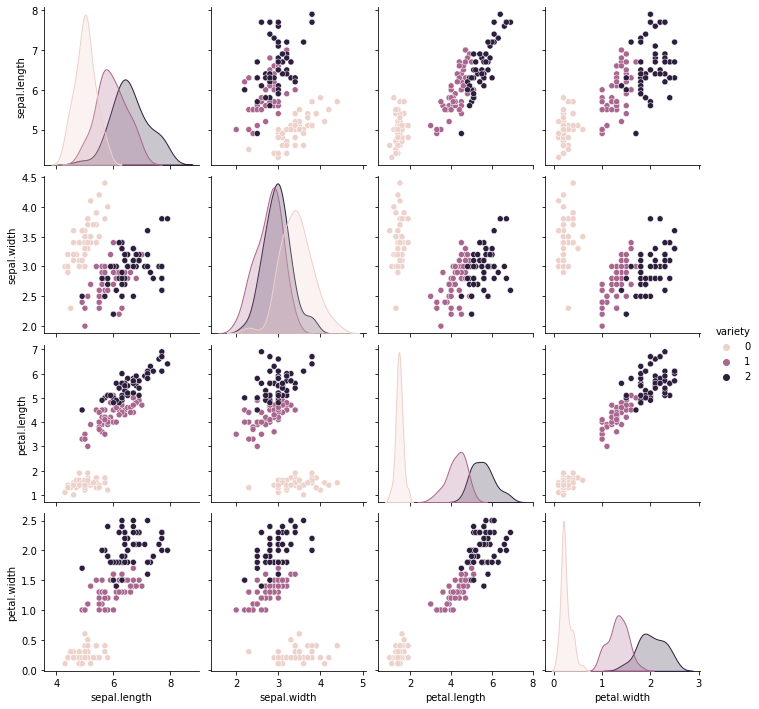

In [5]:
sns.pairplot(df, hue = 'variety')

Pelos gráficos conseguimos observar que as características sepal lenght e  sepal width não são tão determinantes para mostrar onde os pontos estão, enquanto petal lenght e petal width seguem um padrão, por isso, irei utilizar as duas últimas citadas para os plots de resultados.

In [6]:
df_new = df.copy()
df_new
del df_new['petal.length']
X1 = df_new.iloc[:,:]
y1 = df.iloc[:,2:3]
X = np.array(X1)
y = np.array(y1)

## TESTES

### UTILIZANDO HOLDOUT

#### REGRESSÃO LINEAR

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
REGRESSÃO LINEAR
MÉDIA: 0.9668900146472476
DESVIO PADRÃO: 0.007326724695435661
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


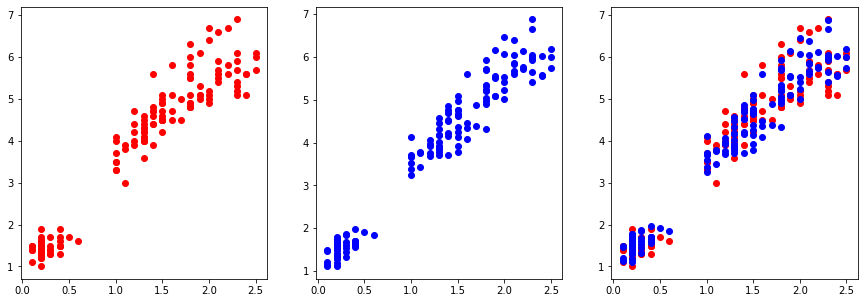

In [7]:
# CRIAÇÃO DE LISTA PARA ARAMAZENAR A MÉDIA 
lista = []

# BOOTSTRAP DE DADOS E TREINAMENTO DO ALGORITMO, ARMAZENANDO A MÉDIA DE CADA TESTE NAS LISTA.
for c in range(0,200):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=c)

  reg = LinearRegression()
  reg.fit(X_train,y_train)
  lista.append(reg.score(X_test, y_test))

# MÉDIA E DESVIO PADRÃO 

A = np.array(lista[:])
B = np.mean(A)
B1 = np.std(A)
print('-=' * 30)
print('REGRESSÃO LINEAR')
print(f'MÉDIA: {B}')
print(f'DESVIO PADRÃO: {B1}')
print('-=' * 30)

K1 = []
for c in A:
  K1.append(abs(B - c))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(K1.index(min(K1)))) 
reg = LinearRegression()
reg.fit(X_train,y_train)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].scatter(X[:, 2:3], y[:,:], color ="red")  
ax[1].scatter(X[:, 2:3], reg.predict(X)[:,:], color ="blue")
ax[2].scatter(X[:, 2:3], y[:,:], color ="red")  
ax[2].scatter(X[:, 2:3], reg.predict(X)[:,:], color ="blue")    


#### SVR

In [8]:
# CRIAÇÃO DE LISTAS PARA ARAMAZENAR A MÉDIA 
lista1 = []
todos = list()
modelo = dict()
# BOOTSTRAP DE DADOS E TREINAMENTO DO ALGORITMO, ARMAZENANDO A MÉDIA DE CADA TESTE NAS LISTA.
for m,n in [('rbf', 1), ('rbf', 2), ('rbf', 3), ('rbf', 4), ('linear', 1), ('linear', 2), ('linear', 3), ('linear', 4)]:
  regr = SVR(kernel=m, C=n)
  for c in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=c)

    
    regr.fit(X_train, y_train.ravel())
    lista1.append(regr.score(X_test, y_test))

  # MÉDIA E DESVIO PADRÃO 
  C = np.array(lista1[:])
  D = np.mean(C)
  D1 = np.std(C)

  modelo['kernel'] = m
  modelo['c'] = n
  modelo['mean'] = D
  modelo['std'] = D1
  todos.append(modelo.copy())
  modelo.clear
  lista1.clear()
new_df = pd.DataFrame(todos)
new_df



,kernel,c,mean,std
0,rbf,1,0.970556,0.007113
1,rbf,2,0.973151,0.006656
2,rbf,3,0.974458,0.006248
3,rbf,4,0.975260,0.005894
4,linear,1,0.967168,0.007451
5,linear,2,0.967078,0.007393
6,linear,3,0.967014,0.007376
7,linear,4,0.966977,0.007367


In [9]:

lista2 = []
todos = list()
modelo = dict()

for m,p,n in [('poly', 1, 1), ('poly', 2, 1), ('poly', 3, 1), ('poly', 1, 2), ('poly', 2, 2), ('poly', 3, 2), ('poly', 1, 3), ('poly', 2, 3),
            ('poly', 3, 3), ('poly', 1, 4), ('poly', 2, 4), ('poly', 3, 4)]:
  regr = SVR(kernel=m, degree=p, C=n)
  for c in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=c)

    
    regr.fit(X_train, y_train.ravel())
    lista2.append(regr.score(X_test, y_test))


  C = np.array(lista2[:])
  D = np.mean(C)
  D1 = np.std(C)

  modelo['kernel'] = m
  modelo['degree'] = p
  modelo['c'] = n
  modelo['mean'] = D
  modelo['std'] = D1
  todos.append(modelo.copy())
  modelo.clear
  lista2.clear()
new_df_1 = pd.DataFrame(todos)
new_df_1


,kernel,degree,c,mean,std
0,poly,1,1,0.966007,0.008027
1,poly,2,1,0.961255,0.009422
2,poly,3,1,0.950929,0.009815
3,poly,1,2,0.966792,0.007906
4,poly,2,2,0.964773,0.008393
5,poly,3,2,0.953507,0.009069
6,poly,1,3,0.966945,0.007752
7,poly,2,3,0.966767,0.007775
8,poly,3,3,0.954570,0.008815
9,poly,1,4,0.967052,0.007698


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
SVR
MÉDIA: 0.9752599438795397
DESVIO PADRÃO: 0.005893918118967613
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


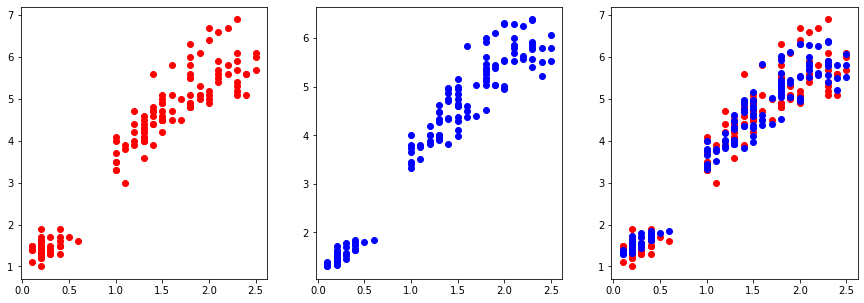

In [10]:
regr = SVR(kernel='rbf', C=4)
for c in range(0,200):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=c)

  regr.fit(X_train, y_train.ravel())
  lista2.append(regr.score(X_test, y_test))

  # MÉDIA E DESVIO PADRÃO 
C = np.array(lista2[:])
D = np.mean(C)
D1 = np.std(C)


K2 = []
for c in C:
  K2.append(abs(D - c))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(K2.index(min(K2)))) 
regr.fit(X_train,y_train.ravel())

print('-=' * 30)
print('SVR')
print(f'MÉDIA: {D}')
print(f'DESVIO PADRÃO: {D1}')
print('-=' * 30)


regr.predict(X)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].scatter(X[:, 2:3], y[:,:], color ="red")  
ax[1].scatter(X[:, 2:3], regr.predict(X).reshape(150,1)[:,0:1], color ="blue")
ax[2].scatter(X[:, 2:3], y[:,:], color ="red")  
ax[2].scatter(X[:, 2:3], regr.predict(X).reshape(150,1)[:,0:1], color ="blue")    




#### MLP

In [11]:
# CRIAÇÃO DE LISTAS PARA ARAMAZENAR A MÉDIA 
lista3 = []
todos_1 = list()
modelo_1 = dict()
# BOOTSTRAP DE DADOS E TREINAMENTO DO ALGORITMO, ARMAZENANDO A MÉDIA DE CADA TESTE NAS LISTA.
for a,b in [ (1, 50), (1, 300), (1, 800),
            (50, 50), (50, 300), (50, 800),
            (500, 50), (500, 300), (500, 800),
            (1000, 50), (1000, 300), (1000, 800)
            ]:
  regrRN = MLPRegressor(hidden_layer_sizes=(a,),activation='tanh', random_state=1, max_iter=b, n_iter_no_change=10)
  for c in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=c)

    
    regrRN.fit(X_train, y_train.ravel())
    lista3.append(regrRN.score(X_test, y_test))

  # MÉDIA E DESVIO PADRÃO 
  E = np.array(lista3[:])
  F = np.mean(E)
  F1 = np.std(E)

  modelo_1['hidden_layer_sizes'] = a
  modelo_1['max_iter'] = b
  modelo_1['n_iter'] = regrRN.n_iter_
  modelo_1['mean'] = F
  modelo_1['std'] = F1
  todos_1.append(modelo_1.copy())
  modelo_1.clear
  lista3.clear()
new_df_2 = pd.DataFrame(todos_1)
new_df_2

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692:

,hidden_layer_sizes,max_iter,n_iter,mean,std
0,1,50,50,-3.697175,0.555393
1,1,300,300,-2.587563,0.447548
2,1,800,800,-1.243223,0.280126
3,50,50,50,0.309870,0.018685
4,50,300,231,0.965772,0.003959
5,50,800,231,0.965772,0.003959
6,500,50,21,0.427263,0.165975
7,500,300,21,0.433621,0.184123
8,500,800,21,0.433621,0.184123
9,1000,50,50,0.747343,0.159868


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
MLP
MÉDIA: 0.9657717604383149
DESVIO PADRÃO: 0.0039588207031720744
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


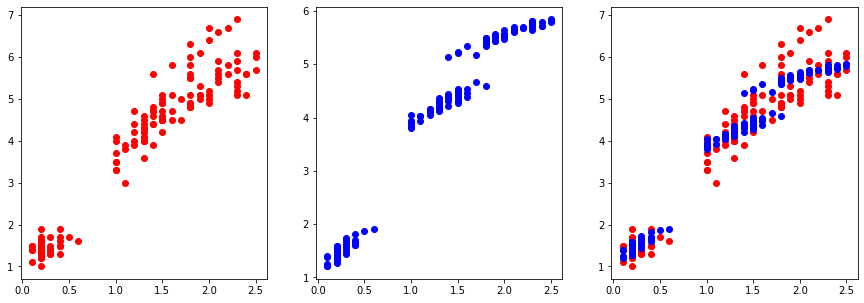

In [12]:
regrRN = MLPRegressor(hidden_layer_sizes=(50,),activation='tanh', random_state=1, max_iter=800, n_iter_no_change=10)
for c in range(0,10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=c)

  regrRN.fit(X_train, y_train.ravel())
  lista3.append(regrRN.score(X_test, y_test.ravel()))

  # MÉDIA E DESVIO PADRÃO 
E = np.array(lista3[:])
F = np.mean(E)
F1 = np.std(E)


K3 = []
for c in E:
  K3.append(abs(F - c))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(K3.index(min(K3)))) 
regrRN.fit(X_train,y_train.ravel())

print('-=' * 30)
print('MLP')
print(f'MÉDIA: {F}')
print(f'DESVIO PADRÃO: {F1}')
print('-=' * 30)


regrRN.predict(X)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].scatter(X[:, 2:3], y[:,:], color ="red")  
ax[1].scatter(X[:, 2:3], regrRN.predict(X).reshape(150,1)[:,0:1], color ="blue")
ax[2].scatter(X[:, 2:3], y[:,:], color ="red")  
ax[2].scatter(X[:, 2:3], regrRN.predict(X).reshape(150,1)[:,0:1], color ="blue")    


## COMPARAÇÃO

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


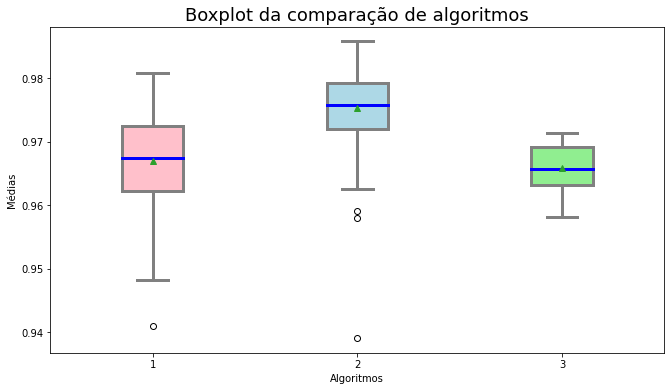

In [13]:
lista_m = [lista, lista2, lista3]
plt.figure(figsize =(11, 6))

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
bplots = plt.boxplot(lista_m, vert = 1, patch_artist = True, showmeans=True,
                      )

# Cor do corpo do boxplot
colors = ['pink', 'lightblue', 'lightgreen', 'red']
for i, bplot in enumerate(bplots['boxes']):
  bplot.set(color='gray', linewidth=3)
  bplot.set(facecolor = colors[i])

# Linhas de contorno
for whisker in bplots['whiskers']:
  whisker.set(color='gray', linewidth=3)

for cap in bplots['caps']:
  cap.set(color='gray', linewidth=3)

for median in bplots['medians']:
  median.set(color='blue', linewidth=3)

plt.title("Boxplot da comparação de algoritmos", loc="center", fontsize=18)
plt.xlabel("Algoritmos")
plt.ylabel("Médias")


plt.show()

### UTILIZANDO K-FOLD

#### REGRESSÃO LINEAR

In [14]:
skf = KFold(n_splits=10, random_state=48, shuffle=True)
skf.get_n_splits(X, y)

print(skf)

lista_ = list()

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    lista_.append(reg.score(X_test, y_test))

# MÉDIA E DESVIO PADRÃO 

A = np.array(lista_[:])
B = np.mean(A)
B1 = np.std(A)
print('-=' * 30)
print('REGRESSÃO LINEAR')
print(f'MÉDIA: {B}')
print(f'DESVIO PADRÃO: {B1}')
print('-=' * 30)

K1 = []
for c in A:
  K1.append(abs(B - c))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(K1.index(min(K1)))) 
reg = LinearRegression()
reg.fit(X_train,y_train) 

KFold(n_splits=10, random_state=48, shuffle=True)
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
REGRESSÃO LINEAR
MÉDIA: 0.9589300742059652
DESVIO PADRÃO: 0.0307458979972198
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


LinearRegression()

#### SVR

In [15]:
# CRIAÇÃO DE LISTAS PARA ARAMAZENAR A MÉDIA 
lista2 = []
todos = list()
modelo = dict()
# BOOTSTRAP DE DADOS E TREINAMENTO DO ALGORITMO, ARMAZENANDO A MÉDIA DE CADA TESTE NAS LISTA.
for m,n in [('rbf', 1), ('rbf', 2), ('rbf', 3), ('rbf', 4), ('linear', 1), ('linear', 2), ('linear', 3), ('linear', 4),
            ('sigmoid', 1), ('sigmoid', 2), ('sigmoid', 3), ('sigmoid', 4)]:
  regr = SVR(kernel=m, C=n)
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    regr.fit(X_train, y_train.ravel())
    lista2.append(regr.score(X_test, y_test))

  # MÉDIA E DESVIO PADRÃO 
  C = np.array(lista2[:])
  D = np.mean(C)
  D1 = np.std(C)

  modelo['kernel'] = m
  modelo['c'] = n
  modelo['mean'] = D
  modelo['std'] = D1
  todos.append(modelo.copy())
  modelo.clear
  lista2.clear()
new_df = pd.DataFrame(todos)
new_df


,kernel,c,mean,std
0,rbf,1,0.966187,0.020054
1,rbf,2,0.969442,0.018706
2,rbf,3,0.970327,0.018910
3,rbf,4,0.971478,0.018005
4,linear,1,0.958178,0.032740
5,linear,2,0.958272,0.032740
6,linear,3,0.958301,0.032716
7,linear,4,0.958376,0.032673
8,sigmoid,1,-0.451386,0.194141
9,sigmoid,2,-0.806762,0.274683


In [16]:

lista2 = []
todos = list()
modelo = dict()

for m,p,n in [('poly', 1, 1), ('poly', 2, 1), ('poly', 3, 1), ('poly', 1, 2), ('poly', 2, 2), ('poly', 3, 2), ('poly', 1, 3), ('poly', 2, 3),
            ('poly', 3, 3), ('poly', 1, 4), ('poly', 2, 4), ('poly', 3, 4)]:
  regr = SVR(kernel=m, degree=p, C=n)
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    regr.fit(X_train, y_train.ravel())
    lista2.append(regr.score(X_test, y_test))


  C = np.array(lista2[:])
  D = np.mean(C)
  D1 = np.std(C)

  modelo['kernel'] = m
  modelo['degree'] = p
  modelo['c'] = n
  modelo['mean'] = D
  modelo['std'] = D1
  todos.append(modelo.copy())
  modelo.clear
  lista2.clear()
new_df = pd.DataFrame(todos)
new_df


,kernel,degree,c,mean,std
0,poly,1,1,0.956389,0.031789
1,poly,2,1,0.951534,0.039381
2,poly,3,1,0.941186,0.035731
3,poly,1,2,0.957045,0.031905
4,poly,2,2,0.955688,0.037065
5,poly,3,2,0.945457,0.030216
6,poly,1,3,0.957507,0.032064
7,poly,2,3,0.958638,0.033703
8,poly,3,3,0.946194,0.027779
9,poly,1,4,0.957483,0.032733


#### MLP

In [17]:
# CRIAÇÃO DE LISTAS PARA ARAMAZENAR A MÉDIA 
lista3 = []
todos_1 = list()
modelo_1 = dict()
# BOOTSTRAP DE DADOS E TREINAMENTO DO ALGORITMO, ARMAZENANDO A MÉDIA DE CADA TESTE NAS LISTA.
for a,b in [ (1, 50), (1, 300), (1, 800),
            (50, 50), (50, 300), (50, 800),
            (500, 50), (500, 300), (500, 800),
            (1000, 50), (1000, 300), (1000, 800)
            ]:
  regrRN = MLPRegressor(hidden_layer_sizes=(a,),activation='tanh', random_state=1, max_iter=b, n_iter_no_change=10)
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    regrRN.fit(X_train, y_train.ravel())
    lista3.append(regrRN.score(X_test, y_test))

  # MÉDIA E DESVIO PADRÃO 
  E = np.array(lista3[:])
  F = np.mean(E)
  F1 = np.std(E)

  modelo_1['hidden_layer_sizes'] = a
  modelo_1['max_iter'] = b
  modelo_1['n_iter'] = regrRN.n_iter_
  modelo_1['mean'] = F
  modelo_1['std'] = F1
  todos_1.append(modelo_1.copy())
  modelo_1.clear
  lista3.clear()
new_df_1 = pd.DataFrame(todos_1)
new_df_1

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692:

,hidden_layer_sizes,max_iter,n_iter,mean,std
0,1,50,50,-5.237574,3.400027
1,1,300,300,-3.822050,2.745236
2,1,800,800,-2.018880,1.709485
3,50,50,50,0.225901,0.124327
4,50,300,227,0.951025,0.027908
5,50,800,227,0.951025,0.027908
6,500,50,21,0.432535,0.241624
7,500,300,21,0.432902,0.242305
8,500,800,21,0.432902,0.242305
9,1000,50,50,0.752433,0.140022


## CONCLUSÃO

Observando o comportamento da MLP, vimos que ela começa se ajustando, melhora e sepois sofre um ajuste de novo e muito provavelmente se colocassemos mais iterações ela poderia passar o SVR. Porém o SVR em um tempo muito mais rápido nesse simples problema que é a Iris obteve resultados muito mais consistentes como mostra o BoxPlot, por isso, devido à melhor perfomance por tempo e à complexidade adequada do problema, o escolhido foi o SVR.

# AGRUPAMENTO

## DATASET

O grupo examinado foi composto por grãos pertencentes a três variedades diferentes de trigo: Kama, Rosa e Canadian, 70 elementos cada, selecionados aleatoriamente para o experimento. A visualização de alta qualidade da estrutura interna do kernel foi detectada usando uma técnica de raio-X suave.

É não destrutivo e consideravelmente mais barato do que outras técnicas de imagem mais sofisticadas, como microscopia de varredura ou tecnologia a laser. 
As imagens foram gravadas em placas de raios X KODAK de 13x18 cm. Os estudos foram conduzidos usando grãos de trigo colhidos em colheitas combinadas provenientes de campos experimentais, explorados no Instituto de Agrofísica da Academia Polonesa de Ciências em Lublin. 

O conjunto de dados pode ser usado para as tarefas de classificação e análise de cluster. Para construir os dados, sete parâmetros geométricos de grãos de trigo foram medidos: 1. área A, 2. perímetro P, 3. compacidade C = 4*pi*A/P^2, 4. comprimento do kernel, 5. largura do kernel, 6. coeficiente de assimetria 7. comprimento do sulco do kernel. Todos esses parâmetros foram contínuos com valor real.

In [18]:
dc = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', header=None, error_bad_lines=False)
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       199 non-null    float64
 1   1       199 non-null    float64
 2   2       199 non-null    float64
 3   3       199 non-null    float64
 4   4       199 non-null    float64
 5   5       199 non-null    float64
 6   6       199 non-null    float64
 7   7       199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [19]:
np.unique(dc[7], return_counts=True)

(array([1, 2, 3]), array([66, 68, 65]))

In [20]:
grafico = px.scatter_matrix(dc, dimensions=[0, 1, 2, 3, 4, 5, 6], color=7)
grafico.show()

In [21]:
X = np.array(dc.iloc[:,0:7])
y = np.array(dc.iloc[:, -1])

Para os plots de análise iremos utilizar as seguintes características: 2 e 3.

## TESTES

### K-MEANS

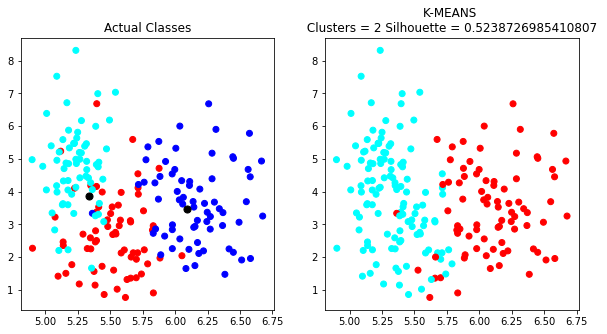

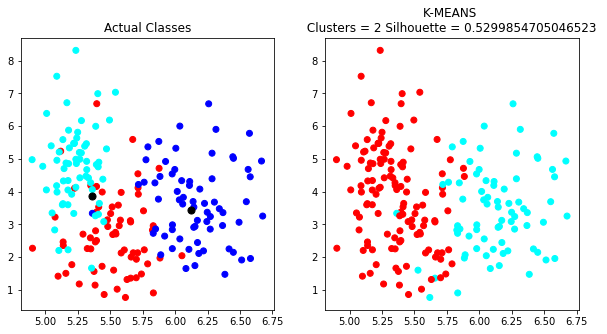

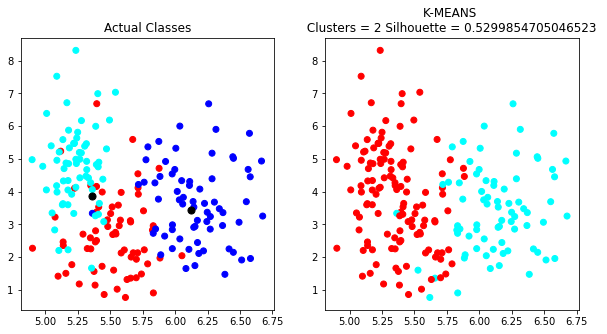

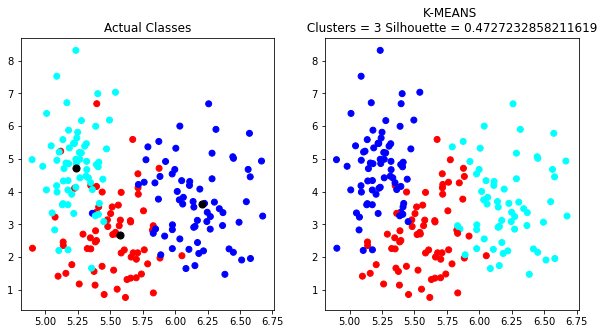

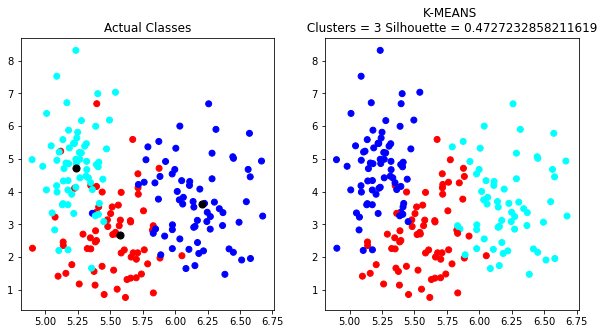

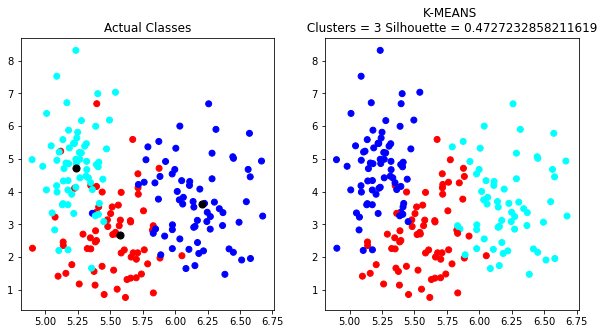

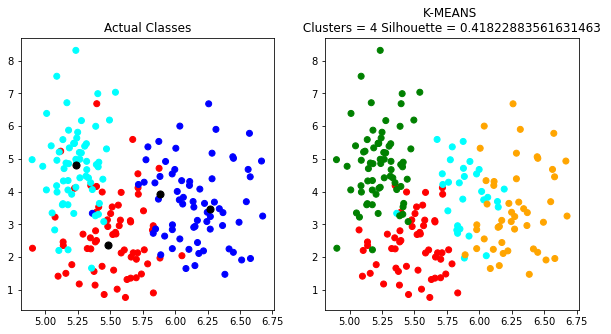

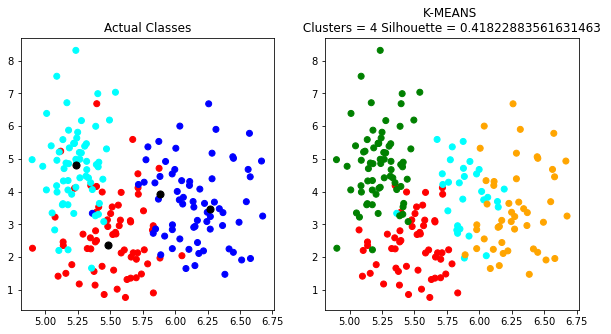

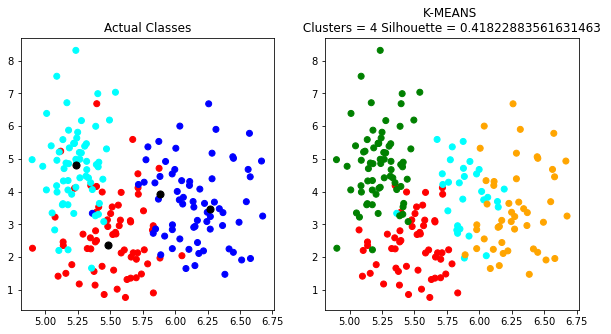

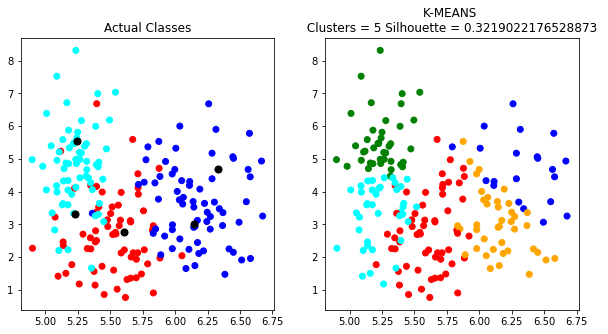

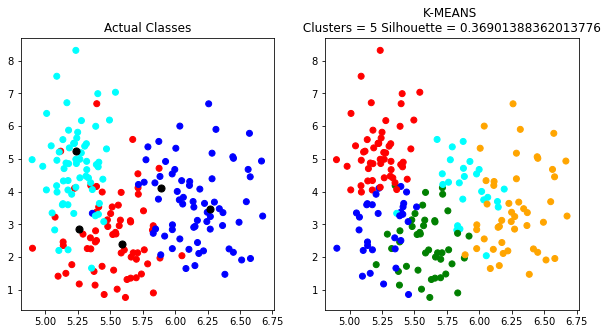

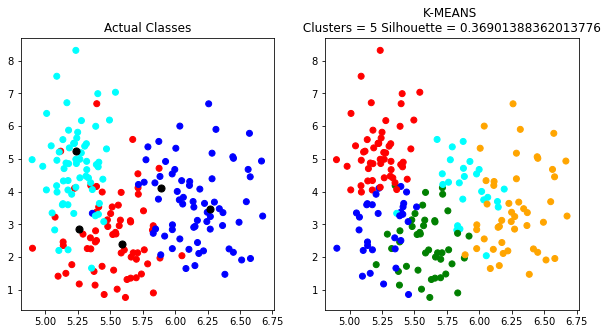

In [22]:
colors = ['red', 'green', 'blue', 'orange', 'cyan']
for a,b in [(2,1), (2,5), (2,10),
            (3,1), (3,5), (3,10), 
            (4,1), (4,5), (4,10),
            (5,1), (5,5), (5,10),]:
  c = 0
  k_means = KMeans(init="random", n_clusters=a, n_init=b, random_state=c)
  k_means.fit(X)
  c =+ 1
  centers = k_means.cluster_centers_
  silhouette_avg = silhouette_score(X, k_means.predict(X))

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
  ax[0].scatter(X[:, 3:4], X[:,5:6], c=y, cmap=ListedColormap(colors))
  ax[0].scatter(centers[:,3:4], centers[:,5:6], c="k", s=50, label='proto')
  ax[0].title.set_text('Actual Classes')
  ax[1].scatter(X[:, 3:4], X[:,5:6], c=k_means.predict(X), cmap=ListedColormap(colors))
  ax[1].title.set_text(f'K-MEANS \n Clusters = {a} Silhouette = {silhouette_avg} ') 


### SOM

In [23]:
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from sklearn_som.som import SOM

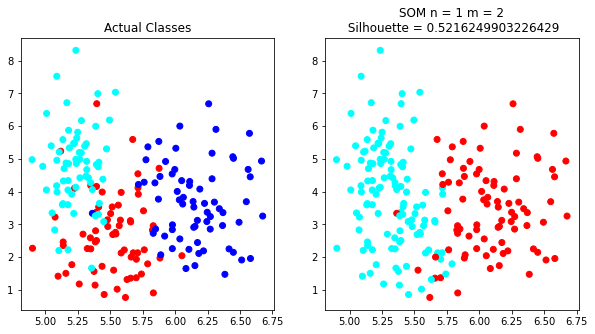

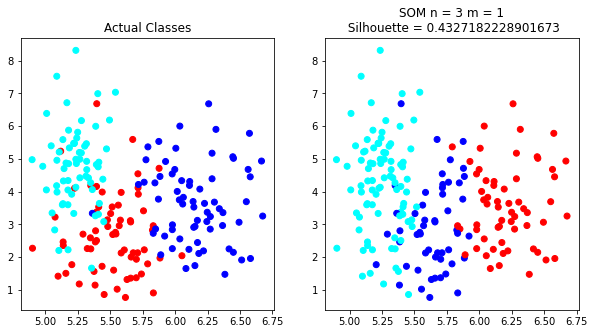

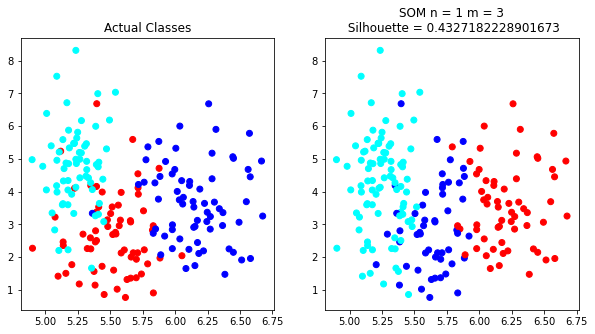

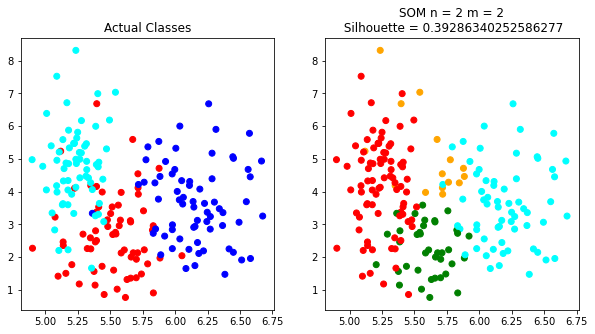

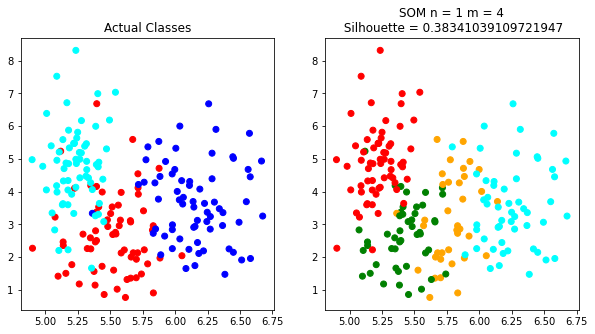

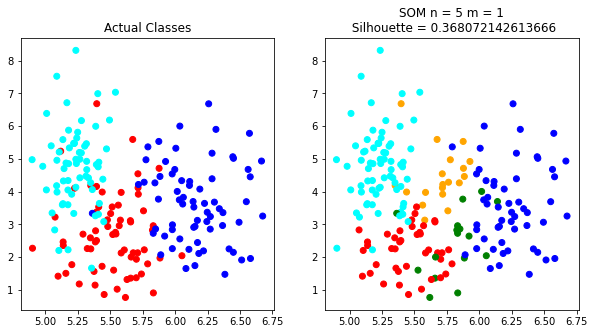

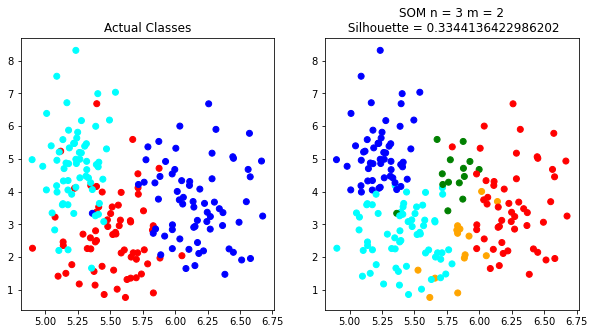

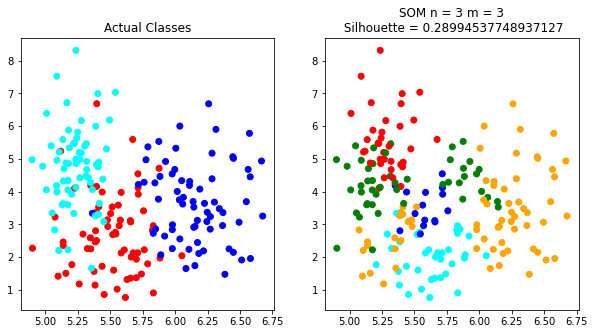

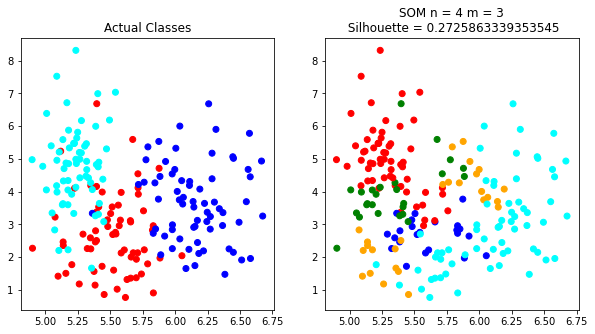

In [25]:
for m,n in [(2,1),(1,3), (3,1), (2,2), (4,1), (1,5), (2,3), (3,3), (3,4)]:
  c = 0
  som = SOM(m=m, n=n, dim=X.shape[1], random_state=c, sigma=0.9)
  c =+ 1
  som.fit(X)
  silhouette_avg = silhouette_score(X, som.predict(X))


  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
  

  ax[0].scatter(X[:, 3:4], X[:,5:6], c=y, cmap=ListedColormap(colors))
  ax[0].title.set_text('Actual Classes')
  ax[1].scatter(X[:, 3:4], X[:,5:6], c=som.predict(X), cmap=ListedColormap(colors))
  ax[1].title.set_text(f'SOM n = {n} m = {m}\n Silhouette = {silhouette_avg}')




## COMPARAÇÃO

Usando a métrica de Silhouette, o agrupador escolhido foi SOM.

# CLASSIFICADOR

In [26]:
df = pd.read_csv('https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df.variety = pd.factorize(df.variety)[0]
X1 = df.iloc[:,0:4] 
y = df.iloc[:,-1] 
X1 = np.array(X1)
y = np.array(y)
k_means = KMeans(init="random", n_clusters=3, random_state=42)
k_means.fit(X1)
centers = k_means.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]


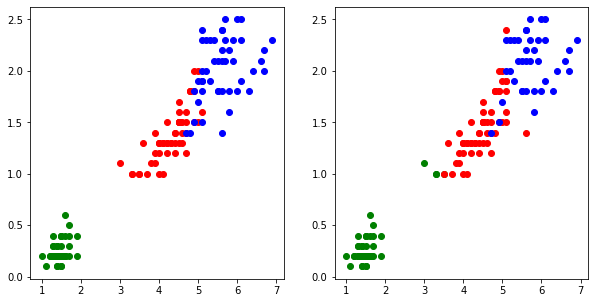

In [27]:
m0 = centers[1].mean(axis = 0)
m1 = centers[0].mean(axis = 0)
m2 = centers[2].mean(axis = 0)
predict = list()
for a in X1:
  d1 = np.linalg.norm(a - m0)
  d2 = np.linalg.norm(a - m1)
  d3 = np.linalg.norm(a - m2)
  if min(d1, d2, d3) == d1:
    predict.append(0)
  elif min(d1, d2, d3) == d2:
    predict.append(1)
  else:
    predict.append(2)
print(np.array(predict))

n0 = X1[y == 0].mean(axis = 0)
n1 = X1[y == 1].mean(axis = 0)
n2 = X1[y == 2].mean(axis = 0)
predict_n = list()

for a in X1:
  d1 = np.linalg.norm(a - n0)
  d2 = np.linalg.norm(a - n1)
  d3 = np.linalg.norm(a - n2)
  if min(d1, d2, d3) == d1:
    predict_n.append(0)
  elif min(d1, d2, d3) == d2:
    predict_n.append(1)
  else:
    predict_n.append(2)
print(np.array(predict_n))

predict = np.array(predict)
predict_n = np.array(predict_n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(X1[:, 2:3][predict_n==0], X1[:,3:4][predict_n==0], color ="green")  
ax[0].scatter(X1[:, 2:3][predict_n==1], X1[:,3:4][predict_n==1], color ="red")
ax[0].scatter(X1[:, 2:3][predict_n==2], X1[:,3:4][predict_n==2], color ="blue")  
ax[1].scatter(X1[:, 2:3][predict==0], X1[:,3:4][predict==0], color ="green")  
ax[1].scatter(X1[:, 2:3][predict==1], X1[:,3:4][predict==1], color ="red")
ax[1].scatter(X1[:, 2:3][predict==2], X1[:,3:4][predict==2], color ="blue")   